<a href="https://colab.research.google.com/github/S3IFK/Practise/blob/main/Transformer_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = {"Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook", "Instagram", "Facebook", "Instagram"],
        "Review": ["Love the new update", "Too may ads", "Great for sharing stories", "Privacy concerns with latest update", "Amazing Filter", "Too much spam","easy to connect friends","Customer support lacking"],
        "Age": [21,19,np.nan, 17,24, np.nan, 30, 61],
        "Sentiment": [1,0,1,0,0,1,0,1]
        }

df = pd.DataFrame(data)

print(df)

  Social Media Platform                               Review   Age  Sentiment
0               Twitter                  Love the new update  21.0          1
1              Facebook                          Too may ads  19.0          0
2             Instagram            Great for sharing stories   NaN          1
3               Twitter  Privacy concerns with latest update  17.0          0
4              Facebook                       Amazing Filter  24.0          0
5             Instagram                        Too much spam   NaN          1
6              Facebook              easy to connect friends  30.0          0
7             Instagram             Customer support lacking  61.0          1


In [17]:

def count_words(Reviews):
  return np.array([len(Review.split()) for Review in Reviews]).reshape(-1,1)

In [18]:
from sklearn.preprocessing import FunctionTransformer

word_count_trans = FunctionTransformer(count_words)

In [19]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
feature_union = FeatureUnion([('word count', word_count_trans), ('bag of words' , CountVectorizer())])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [21]:
col_trans = ColumnTransformer(
    transformers=[
        ('age_imputer', SimpleImputer(strategy='mean'),['Age']),
        ('plat_ohe', OneHotEncoder(), ['Social Media Platform']),
        ('review_processing', feature_union, 'Review')
      ],
    remainder = 'drop'
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest, chi2

In [23]:
from sklearn.pipeline import Pipeline
final_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('Scaler', MaxAbsScaler()),
    ('selector', SelectKBest(score_func=chi2,k=10)),
    ('Classifier', LogisticRegression())
])

In [24]:
final_pipeline.fit(df.drop(columns=['Sentiment']), df['Sentiment'])

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('age_imputer',
                                                  SimpleImputer(), ['Age']),
                                                 ('plat_ohe', OneHotEncoder(),
                                                  ['Social Media Platform']),
                                                 ('review_processing',
                                                  FeatureUnion(transformer_list=[('word '
                                                                                  'count',
                                                                                  FunctionTransformer(func=<function count_words at 0x7932936dcb80>)),
                                                                                 ('bag '
                                                                                  'of '
                                                                                  'words',
                                                                                  CountVectorizer())]),
                                                  'Review')])),
                ('Scaler', MaxAbsScaler()),
                ('selector',
                 SelectKBest(score_func=<function chi2 at 0x7932939e6830>)),
                ('Classifier', LogisticRegression())])

In [31]:
df['Sentiment'].value_counts()

1    4
0    4
Name: Sentiment, dtype: int64

<Axes: ylabel='Sentiment'>

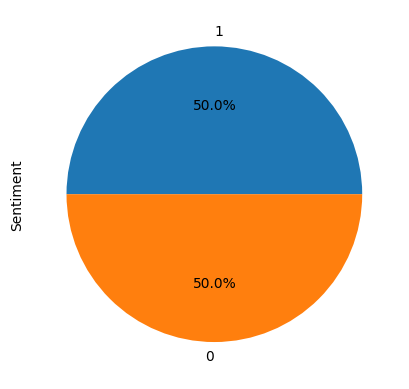

In [32]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%0.1f%%')